# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


# Visualizar el dataset en un 10x10 grid

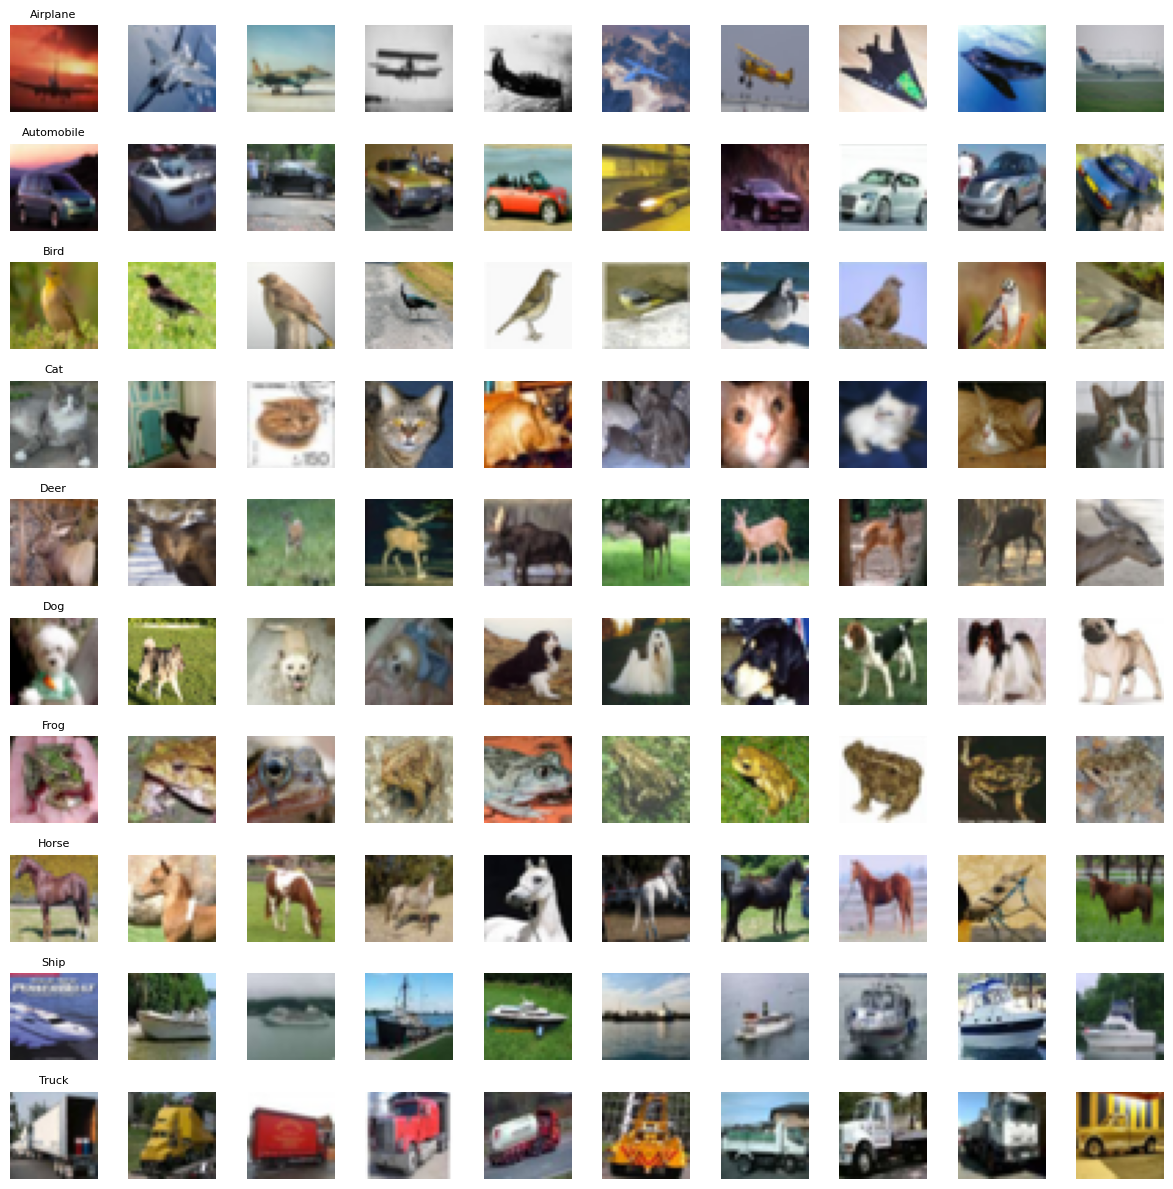

In [2]:
# Your code here :
# Define class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Select 10 random images from each class
def plot_cifar10_examples(x, y):
    plt.figure(figsize=(12, 12))
    for class_index in range(10):
        # Find indices of images belonging to the current class
        class_indices = np.where(y.flatten() == class_index)[0]
        # Randomly select 10 images from these indices
        selected_indices = np.random.choice(class_indices, 10, replace=False)
        for i, img_index in enumerate(selected_indices):
            plt.subplot(10, 10, class_index * 10 + i + 1)
            plt.imshow(x[img_index])
            plt.axis('off')
            if i == 0:
                plt.title(class_names[class_index], fontsize=8)
    plt.tight_layout()
    plt.show()

# Plot the 10x10 grid
plot_cifar10_examples(x_train, y_train)


# Convertir las etiquetas a one-hot encoding

In [3]:
# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Verificar la forma de las etiquetas codificadas
print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)


Shape of y_train_one_hot: (50000, 10)
Shape of y_test_one_hot: (10000, 10)


# Normalizar las imágenes

In [4]:
# Normalize the images
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Verificar los valores mínimo y máximo después de la normalización
print("Min and Max values in x_train_normalized:", x_train_normalized.min(), x_train_normalized.max())
print("Min and Max values in x_test_normalized:", x_test_normalized.min(), x_test_normalized.max())


Min and Max values in x_train_normalized: 0.0 1.0
Min and Max values in x_test_normalized: 0.0 1.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

# Define the model

In [6]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from keras.backend import clear_session

# Clear any existing Keras sessions
clear_session()

# Define the model
model = Sequential([
    # Convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Max pooling layer
    MaxPooling2D(pool_size=(2, 2)),
    # Flatten to feed into dense layers
    Flatten(),
    # Dense layer with 100 units
    Dense(100, activation='relu'),
    # Classification layer with 10 units and softmax activation
    Dense(10, activation='softmax')
])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

# Compile the model

In [7]:
# Your code here :
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)


# Train the model

In [8]:
# Train the model  We train the model on the normalized x_train and one-hot-encoded y_train for 50 epochs with a batch size of 512.
history = model.fit(
    x_train_normalized,
    y_train_one_hot,
    validation_data=(x_test_normalized, y_test_one_hot),
    epochs=50,
    batch_size=512,
    verbose=1
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.1965 - loss: 2.1682 - val_accuracy: 0.3450 - val_loss: 1.8629
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3602 - loss: 1.8227 - val_accuracy: 0.4135 - val_loss: 1.6769
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4198 - loss: 1.6530 - val_accuracy: 0.4573 - val_loss: 1.5352
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4632 - loss: 1.5152 - val_accuracy: 0.4933 - val_loss: 1.4203
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5057 - loss: 1.3939 - val_accuracy: 0.5068 - val_loss: 1.3756
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5364 - loss: 1.3158 - val_accuracy: 0.5451 - val_loss: 1.2810
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5654 - loss: 1.2470 - val_accuracy: 0.5600 - val_loss: 1.2589
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5801 - loss: 1.2010 - val_accuracy: 0.5707 - val_

# Plot the loss and accuracy curves

*   Plot the cross entropy loss curve and the accuracy curve

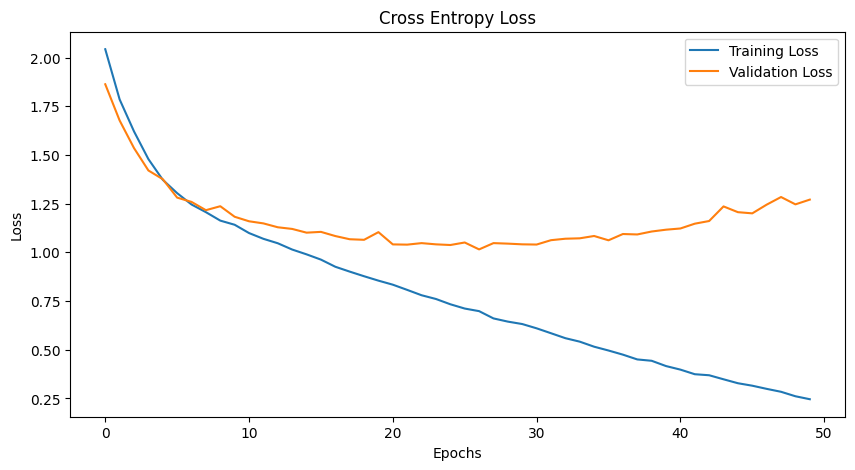

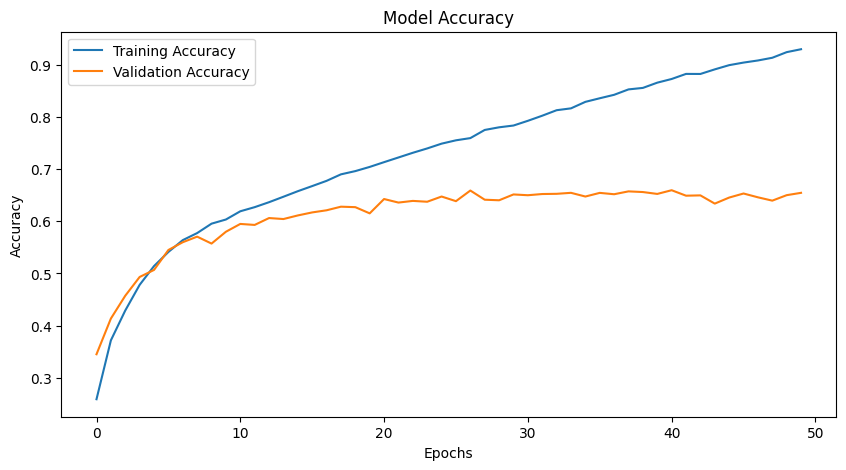

In [9]:
# Your code here :
# Plot the loss and accuracy curves
import matplotlib.pyplot as plt

# Extract values from training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot cross-entropy loss
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


# **Rememebr always clear the session for a new try!**

In [10]:
from keras.backend import clear_session
clear_session()

# Define the VGG-like model

In [11]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Define the VGG-like model
vgg_model = Sequential([
    # First convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    # Second convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    # Max pooling layer
    MaxPooling2D(pool_size=(2, 2)),
    # Flatten the output
    Flatten(),
    # Dense layer with 128 units
    Dense(128, activation='relu'),
    # Classification layer
    Dense(10, activation='softmax')
])

# Model summary
vgg_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

# Compile the model

In [12]:
# Your code here :We'll compile the model with the same configurations as before: categorical crossentropy loss, SGD optimizer, and accuracy metric.

# Compile the model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)


# Train the model

In [13]:
# Train the VGG-like model
vgg_history = vgg_model.fit(
    x_train_normalized,
    y_train_one_hot,
    validation_data=(x_test_normalized, y_test_one_hot),
    epochs=50,
    batch_size=512,
    verbose=1
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.2127 - loss: 2.1409 - val_accuracy: 0.3980 - val_loss: 1.7274
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4082 - loss: 1.6940 - val_accuracy: 0.4484 - val_loss: 1.5711
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4568 - loss: 1.5290 - val_accuracy: 0.5045 - val_loss: 1.3984
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5149 - loss: 1.3725 - val_accuracy: 0.5351 - val_loss: 1.3206
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5525 - loss: 1.2645 - val_accuracy: 0.5344 - val_loss: 1.3154
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5778 - loss: 1.1984 - val_accuracy: 0.5793 - val_loss: 1.1927
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6107 - loss: 1.1079 - val_accuracy: 0.5963 - val_loss: 1.1343
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6314 - loss: 1.0530 - val_accuracy: 0.6118 - 

# PLOT (visualize)

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


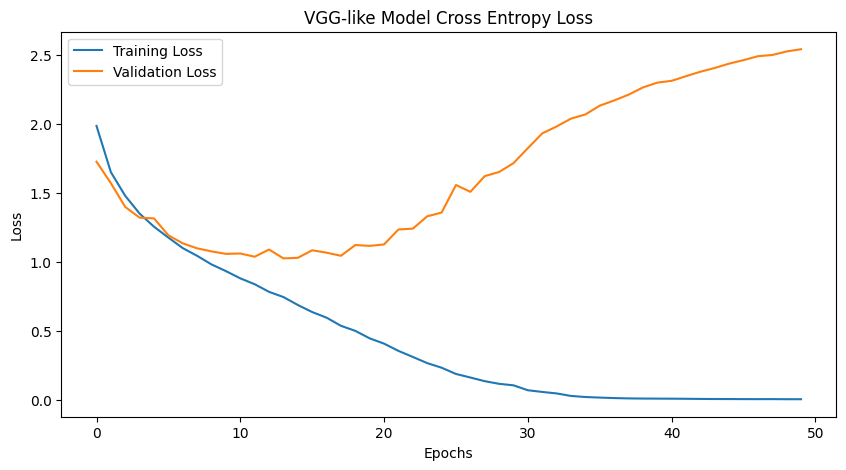

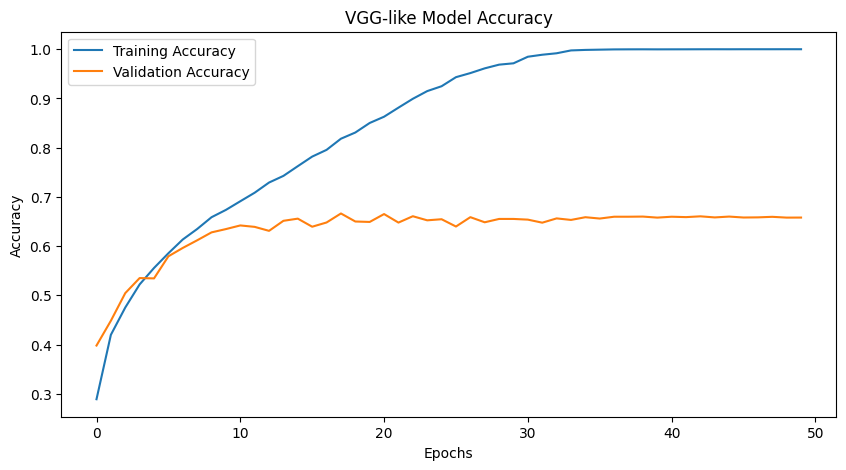

In [14]:
# Your code here :
# Extract values from training history
vgg_loss = vgg_history.history['loss']
vgg_val_loss = vgg_history.history['val_loss']
vgg_accuracy = vgg_history.history['accuracy']
vgg_val_accuracy = vgg_history.history['val_accuracy']

# Plot cross-entropy loss
plt.figure(figsize=(10, 5))
plt.plot(vgg_loss, label='Training Loss')
plt.plot(vgg_val_loss, label='Validation Loss')
plt.title('VGG-like Model Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg_accuracy, label='Training Accuracy')
plt.plot(vgg_val_accuracy, label='Validation Accuracy')
plt.title('VGG-like Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Comment on the observation**

**Training Loss Decreases Consistently:** The training loss decreases steadily over the 50 epochs, showing that the model is effectively learning from the training data.



**Validation Loss Increases After ~10 Epochs:** The validation loss starts to increase after about 10 epochs, indicating that the model is beginning to overfit the training data and not generalizing well to the validation set.



**Training Accuracy Keeps Improving:** The training accuracy continues to improve, approaching 100%, which aligns with the consistent decrease in training loss.



**Validation Accuracy Plateaus:** The validation accuracy increases initially but plateaus around 65–70%, which suggests the model has reached its generalization capacity early in the training process and further training does not improve its performance on unseen data.

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


# **Use the predict function to predict the output for the test split**

In [15]:
# Your code here :

import numpy as np

# Predict the probabilities for the test set
y_pred_probabilities = vgg_model.predict(x_test_normalized)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded true labels back to integers
y_true = np.argmax(y_test_one_hot, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


# Plot the confusion matrix and analyze class confusions

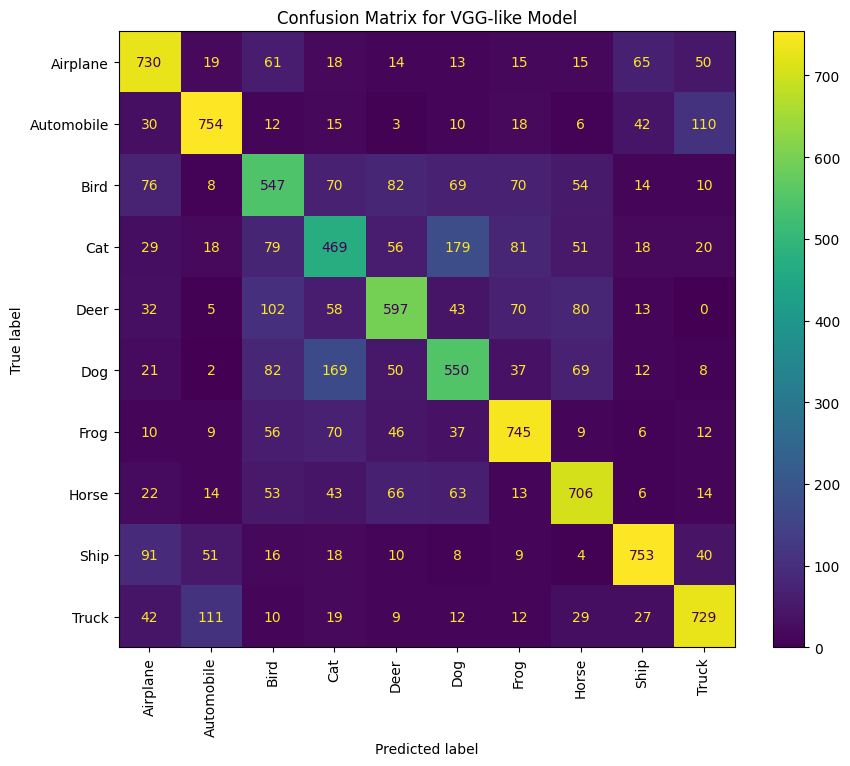

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical', ax=plt.gca())
plt.title('Confusion Matrix for VGG-like Model')
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

# Print the test accuracy

*    Print the test accuracy for the trained model.

In [17]:
# Your code here :

from sklearn.metrics import accuracy_score

# Calculate test accuracy
test_accuracy = accuracy_score(y_true, y_pred)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.6580


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [18]:
from keras.backend import clear_session
clear_session()

# Define the complete VGG-like architecture

In [19]:
# Your code here : The architecture will stack convolutional layers with increasing filters and max pooling, ending with dense layers.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Resizing

# Clear any previous Keras session
clear_session()

# Define the VGG-like model
vgg_full_model = Sequential([
    # Resize input to 64x64
    Resizing(64, 64, interpolation='bilinear'),

    # First stack: 2 Conv layers with 64 filters followed by Max Pooling
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Second stack: 2 Conv layers with 128 filters followed by Max Pooling
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third stack: 2 Conv layers with 256 filters followed by Max Pooling
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output and add dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Display model summary
vgg_full_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

# Compile the model

In [20]:
# Your code here :
# Compile the model
vgg_full_model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)


# Train the model

In [21]:
# Train the VGG-like full model
vgg_full_history = vgg_full_model.fit(
    x_train_normalized,
    y_train_one_hot,
    validation_data=(x_test_normalized, y_test_one_hot),
    epochs=10,
    batch_size=512,
    verbose=1
)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 129s 894ms/step - accuracy: 0.1487 - loss: 2.2515 - val_accuracy: 0.3046 - val_loss: 1.9117
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 381ms/step - accuracy: 0.3332 - loss: 1.8428 - val_accuracy: 0.4454 - val_loss: 1.5376
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - accuracy: 0.4583 - loss: 1.5106 - val_accuracy: 0.4942 - val_loss: 1.4047
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 374ms/step - accuracy: 0.5240 - loss: 1.3379 - val_accuracy: 0.5433 - val_loss: 1.2656
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 378ms/step - accuracy: 0.5770 - loss: 1.1922 - val_accuracy: 0.5852 - val_loss: 1.1772
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 376ms/step - accuracy: 0.6184 - loss: 1.0783 - val_accuracy: 0.6045 - val_loss: 1.1140
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 374ms/step - accuracy: 0.6595 - loss: 0.9711 - val_accuracy: 0.6171 - val_loss: 1.1013
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 376ms/step - accuracy: 0.6934 - loss: 0.8743 - val_acc

# Predict and evaluate

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


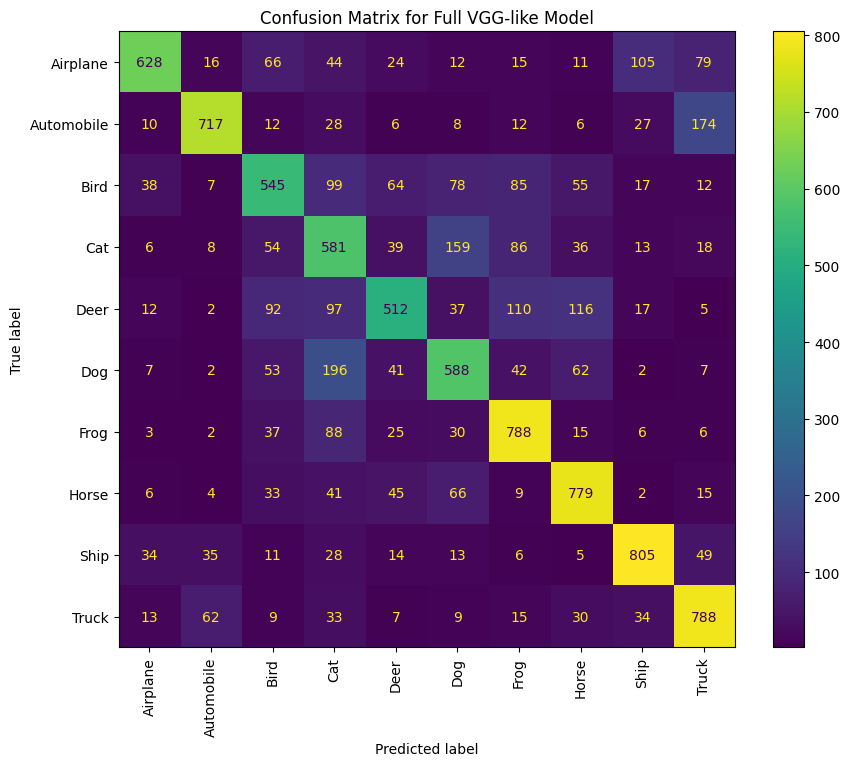

Test Accuracy for Full VGG-like Model: 0.6731


In [22]:
#Use the model to predict the output for the test set and plot the confusion matrix.

# Predict the probabilities for the test set
y_pred_probabilities_full = vgg_full_model.predict(x_test_normalized)

# Convert probabilities to class labels
y_pred_full = np.argmax(y_pred_probabilities_full, axis=1)

# Generate the confusion matrix
conf_matrix_full = confusion_matrix(y_true, y_pred_full)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp_full = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_full, display_labels=class_names)
disp_full.plot(cmap='viridis', xticks_rotation='vertical', ax=plt.gca())
plt.title('Confusion Matrix for Full VGG-like Model')
plt.show()

# Test accuracy
test_accuracy_full = accuracy_score(y_true, y_pred_full)
print(f"Test Accuracy for Full VGG-like Model: {test_accuracy_full:.4f}")


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_Activation functions introduce non-linearity, allowing the network to learn complex patterns.
Without them, the model would behave like a linear function.


2 - Key Differences between sigmoid and softmax:



_Sigmoid outputs a value between 0 and 1, used for binary classification.

Softmax outputs a probability distribution over multiple classes, summing to 1, used for multiclass classification.



3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_Categorical crossentropy is used for multiclass classification with one-hot encoded labels.

Binary crossentropy is used for binary classification with labels as 0 or 1.
